In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
!pip install pymysql
import pymysql

    100% |████████████████████████████████| 51kB 2.0MB/s 


In [0]:
import os
# !pip install pymysql
# import pymysql
import pandas as pd

conn = pymysql.connect(
    host="insight.cxqzkfwl6f4a.us-east-1.rds.amazonaws.com",
    port=int(3306),
    user="shoukydanindenic",
    passwd="54nuq5mi",
    db="insight",
    charset='utf8mb4')

sql = """
SELECT 	
	30 + 1 - datediff(CURDATE(), a.Create_DateTime) as "Days",
	a.Instance_UID as "Customer",
	count(*) as "Count"
FROM alert a
WHERE a.Create_DateTime >= DATE_SUB(CURDATE(), INTERVAL 29 DAY)
	AND a.Rule_Name is not NULL
	AND a.Instance_UID in (
	'7491e5f8-976e-4c65-ad5d-7aa289e454a6',	'ecfbc5a0-cbb9-430c-960e-c915a79a274e',
	'32fd9a0d-9943-4a57-8442-f207f54647e4',	'cb2d4f57-0800-48af-b2b8-c45046f8a928',
	'e3d93ad0-f8d2-4c7e-8835-37644bc7d440',	'280ace25-57fc-4c94-9e44-18d73acf77f1',
	'0880672c-7203-4da3-bf0f-50941d92b709',	'0817a67d-2799-430f-a3e3-74e67538c482',
	'906a9ee3-ca45-4e0d-b58b-0da71f854c32',	'5a33f290-66c1-409a-acd5-7a0e7b66390f',
	'3ad7c1ec-17f0-4eb0-8f3a-ce405eaa1411',	'e1048267-a214-4368-ab99-0005b3657959',
	'ff29622b-fe7e-41cd-8c3f-eed1204ba416',	'c45f1d27-0049-470f-8015-4c9b37781fa5',
	'85c1cec4-7267-4de4-a5a8-9172a4b9b269',	'2dfb7b4f-2ae0-40f8-ba12-37efb25de0c3',
	'98062a6a-8c1c-42b2-a3a3-8591620cc9c8',	'c56c9df4-4934-46e1-a32c-cdd2216a0d48',
	'c2aa47f6-9247-4e3f-bc5d-1c559ecf5d71',	'5d17719d-1347-4ac7-b820-9944b24b6675',
	'1bb59e9c-130c-470c-ab29-2e75c722286a',	'065a693c-80da-4f41-a927-99e2373e743f',
	'6d470f27-ffbc-4d6d-b50e-d0cfc013a431',	'66bbee9f-5c59-4f18-bc95-604324e7f3c5',
	'f14d96ad-a870-46b7-80a8-5868b88c0666',	'3163da0f-f439-4643-aa63-463d655d26a2',
	'07f85908-d056-4aa0-8d03-a2a1e4fa2a41',	'293a66ba-6ee1-4451-81d4-50bb6e2137e1',
	'7eb2f782-5a14-4d21-becc-c9ad289641e9',	'5a33f290-66c1-409a-acd5-7a0e7b66390f',
	'fdad8e82-1c59-47c1-8aa0-a2f4d8eeda5c',	'd90b906e-8b3b-4d9c-9617-de1d90f9632b',
	'13f7fe83-7395-4ea5-9ebc-07f913b3aa6b',	'2a3a02e5-c9f1-4214-9828-3f6c3efd9ca3',
	'9c6dbe69-d47d-4534-bfcc-b7878d35c835',	'35ed24c8-6ef3-45a6-b8af-1fba08ff414f',
	'6334ae6b-c47d-4b9d-bd05-d7d42417f5de',	'677902cd-e7ee-4d99-b34c-100b2841f464'
	)
GROUP BY 1,2 
ORDER BY 2,1;
"""

df = pd.read_sql_query(sql, conn)



In [0]:
# df
df.info()
# df.tail(5)
df.sample(20)
# df.info()
# df.describe()
# num_of_days=len(df)
num_of_days=df["Days"].max()
num_of_days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 3 columns):
Days        862 non-null int64
Customer    862 non-null object
Count       862 non-null int64
dtypes: int64(2), object(1)
memory usage: 20.3+ KB


31

# Building  one DF from all entries filling the missing data with 0

In [0]:
# first we will build a complete Series/DatFrame wth 120 Entries
reference_series=pd.Series(np.arange(2,num_of_days,1))
reference_df=pd.DataFrame(reference_series,columns=['Days'])
reference_df['dummy']=99
reference_df=reference_df.set_index("Days")
reference_df.tail()

,dummy
Days,
26,99
27,99
28,99
29,99
30,99


In [0]:
customer_list=df['Customer'].unique().tolist()
customer_list



['065a693c-80da-4f41-a927-99e2373e743f',
 '07f85908-d056-4aa0-8d03-a2a1e4fa2a41',
 '0817a67d-2799-430f-a3e3-74e67538c482',
 '0880672c-7203-4da3-bf0f-50941d92b709',
 '13f7fe83-7395-4ea5-9ebc-07f913b3aa6b',
 '1bb59e9c-130c-470c-ab29-2e75c722286a',
 '280ace25-57fc-4c94-9e44-18d73acf77f1',
 '293a66ba-6ee1-4451-81d4-50bb6e2137e1',
 '2a3a02e5-c9f1-4214-9828-3f6c3efd9ca3',
 '2dfb7b4f-2ae0-40f8-ba12-37efb25de0c3',
 '3163da0f-f439-4643-aa63-463d655d26a2',
 '35ed24c8-6ef3-45a6-b8af-1fba08ff414f',
 '3ad7c1ec-17f0-4eb0-8f3a-ce405eaa1411',
 '5a33f290-66c1-409a-acd5-7a0e7b66390f',
 '5d17719d-1347-4ac7-b820-9944b24b6675',
 '6334ae6b-c47d-4b9d-bd05-d7d42417f5de',
 '66bbee9f-5c59-4f18-bc95-604324e7f3c5',
 '677902cd-e7ee-4d99-b34c-100b2841f464',
 '6d470f27-ffbc-4d6d-b50e-d0cfc013a431',
 '7491e5f8-976e-4c65-ad5d-7aa289e454a6',
 '7eb2f782-5a14-4d21-becc-c9ad289641e9',
 '85c1cec4-7267-4de4-a5a8-9172a4b9b269',
 '906a9ee3-ca45-4e0d-b58b-0da71f854c32',
 '98062a6a-8c1c-42b2-a3a3-8591620cc9c8',
 '9c6dbe69-d47d-

In [0]:
number_of_costomers=len(customer_list)
number_of_costomers

35

# New Section 

---

let's check what we can do 

In [0]:
# aa=df[df['Customer']=='ff29622b-fe7e-41cd-8c3f-eed1204ba416']
# aa=aa.set_index('Days')
# aa.rename(columns={'Customer': 'todel', 'Count': 'customer'}, inplace=True)
# aa.drop(['todel'],axis=1,inplace=True)
# reference_df=reference_df.join(aa, how='outer')





for cust in customer_list:
  a=df[df['Customer']==cust]
  a=a.set_index('Days')
  a.rename(columns={'Customer': 'todel', 'Count': cust}, inplace=True)
  a.drop(['todel'],axis=1,inplace=True)
  reference_df=reference_df.join(a, how='outer')
  


In [0]:
reference_df.fillna(0,inplace=True)
referance_df=reference_df.drop(['dummy'],axis=1,inplace=True)

In [0]:
reference_df=reference_df.astype('int64')
#reference_df.rename(columns=lambda x: 
reference_df.columns = reference_df.columns.str[0:7]
reference_df

,065a693,07f8590,0817a67,0880672,13f7fe8,1bb59e9,280ace2,293a66b,2a3a02e,2dfb7b4,...,c2aa47f,c45f1d2,cb2d4f5,d90b906,e104826,e3d93ad,ecfbc5a,f14d96a,fdad8e8,ff29622
Days,,,,,,,,,,,,,,,,,,,,,
2,0,5,3,12,29,0,15,6,69,5,...,0,8,6,5,36,38,4,19,42,1
3,0,2,16,9,45,18,11,6,44,3,...,0,0,11,1,30,44,8,12,40,0
4,0,8,6,15,30,9,11,3,47,7,...,0,5,0,5,51,49,6,26,36,2
5,0,6,7,5,33,12,62,0,41,6,...,0,4,0,7,45,42,9,26,33,1
6,0,1,6,10,128,12,69,0,12,6,...,0,6,0,5,39,54,8,14,27,9
7,0,0,8,0,17,25,54,0,12,5,...,0,3,0,7,42,85,6,11,27,0
8,0,4,5,15,13,10,5,0,3,6,...,0,17,0,7,33,58,9,11,19,0
9,0,1,7,6,18,9,11,0,77,5,...,0,5,1,9,47,38,4,24,37,0
10,0,1,5,13,25,3,8,23,17,8,...,0,5,2,7,66,43,6,19,57,0


In [0]:
df_sdoriginal=reference_df.copy()
df_sd=reference_df.copy()
df_sdoriginal

,065a693,07f8590,0817a67,0880672,13f7fe8,1bb59e9,280ace2,293a66b,2a3a02e,2dfb7b4,...,c2aa47f,c45f1d2,cb2d4f5,d90b906,e104826,e3d93ad,ecfbc5a,f14d96a,fdad8e8,ff29622
Days,,,,,,,,,,,,,,,,,,,,,
2,0,5,3,12,29,0,15,6,69,5,...,0,8,6,5,36,38,4,19,42,1
3,0,2,16,9,45,18,11,6,44,3,...,0,0,11,1,30,44,8,12,40,0
4,0,8,6,15,30,9,11,3,47,7,...,0,5,0,5,51,49,6,26,36,2
5,0,6,7,5,33,12,62,0,41,6,...,0,4,0,7,45,42,9,26,33,1
6,0,1,6,10,128,12,69,0,12,6,...,0,6,0,5,39,54,8,14,27,9
7,0,0,8,0,17,25,54,0,12,5,...,0,3,0,7,42,85,6,11,27,0
8,0,4,5,15,13,10,5,0,3,6,...,0,17,0,7,33,58,9,11,19,0
9,0,1,7,6,18,9,11,0,77,5,...,0,5,1,9,47,38,4,24,37,0
10,0,1,5,13,25,3,8,23,17,8,...,0,5,2,7,66,43,6,19,57,0


# here we check running "0"

In [0]:
col_list=df_sdoriginal.columns
for c in col_list:
    a=df_sd[c]
    b=[0]*len(a)
    for i in range(len(a)):
        if a.iloc[i] == 0:
            b[i] = b[i-1] + 1
        else:
            b[i] = 0
    #print ('this is the list of consecative 0 in the {} Column {}'.format(c,b) )
    #b=pd.Series(b) 
    df_sd[c.swapcase()]= pd.Series(b, index=df_sd.index)
    df_sd
df_sd.head()


,065a693,07f8590,0817a67,0880672,13f7fe8,1bb59e9,280ace2,293a66b,2a3a02e,2dfb7b4,...,C2AA47F,C45F1D2,CB2D4F5,D90B906,E104826,E3D93AD,ECFBC5A,F14D96A,FDAD8E8,FF29622
Days,,,,,,,,,,,,,,,,,,,,,
2,0,5,3,0,29,0,15,6,69,5,...,1,0,0,0,0,0,0,0,0,0
3,0,2,16,0,45,18,11,6,44,3,...,2,1,0,0,0,0,0,0,0,1
4,0,8,6,0,30,9,11,3,47,7,...,3,0,1,0,0,0,0,0,0,0
5,0,6,7,0,33,12,62,0,41,6,...,4,0,2,0,0,0,0,0,0,0
6,0,1,6,0,128,12,69,0,12,6,...,5,0,3,0,0,0,0,0,0,0


In [0]:
one_customer=col_list[0]
one_customer_swap=col_list[0].swapcase()
df_sd[[one_customer,one_customer_swap]].tail() 

,065a693,065A693
Days,,
27,34,0
28,32,0
29,14,0
30,5,0
31,0,1


# Now we check the AVG and STD for 4 consequetive numbers

In [0]:
for c in col_list:
    df_sd[c+'avg 4'] = (df_sdoriginal[c].rolling(4).mean())
    df_sd[c+'std 4'] = (df_sdoriginal[c].rolling(4).std())

In [0]:
df_sd.head()

,065a693,07f8590,0817a67,0880672,13f7fe8,1bb59e9,280ace2,293a66b,2a3a02e,2dfb7b4,...,e3d93adavg 4,e3d93adstd 4,ecfbc5aavg 4,ecfbc5astd 4,f14d96aavg 4,f14d96astd 4,fdad8e8avg 4,fdad8e8std 4,ff29622avg 4,ff29622std 4
Days,,,,,,,,,,,,,,,,,,,,,
2,0,5,3,0,29,0,15,6,69,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,16,0,45,18,11,6,44,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,8,6,0,30,9,11,3,47,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,6,7,0,33,12,62,0,41,6,...,43.25,4.573474,6.75,2.217356,20.75,6.701990,37.75,4.031129,1.0,0.816497
6,0,1,6,0,128,12,69,0,12,6,...,47.25,5.377422,7.75,1.258306,19.50,7.549834,34.00,5.477226,3.0,4.082483


In [0]:
 col_list

Index(['065a693', '07f8590', '0817a67', '0880672', '13f7fe8', '1bb59e9',
       '280ace2', '293a66b', '2a3a02e', '2dfb7b4', '3163da0', '35ed24c',
       '3ad7c1e', '5a33f29', '5d17719', '6334ae6', '66bbee9', '677902c',
       '6d470f2', '7491e5f', '7eb2f78', '85c1cec', '906a9ee', '98062a6',
       '9c6dbe6', 'c2aa47f', 'c45f1d2', 'cb2d4f5', 'd90b906', 'e104826',
       'e3d93ad', 'ecfbc5a', 'f14d96a', 'fdad8e8', 'ff29622'],
      dtype='object')

In [0]:
for c in col_list:
    df_sd[c+'res'] = (df_sd[c.swapcase()]>2) | (df_sd[c]<(df_sd[c+'avg 4']-df_sd[c+'std 4']))


In [0]:
# for c in col_list:
#     print ("for the ", c , "check the following",df_sd[c+'res'][df_sd[c+'res']==True])

In [0]:
# for c in col_list:
#     print(df_sd[c+'res'][df_sd[c+'res']==True])

In [0]:
col_list=df_sd.columns
col_res=[c for c in col_list]

col_res[-number_of_costomers:]

In [0]:
%matplotlib inline
final=df_sd[col_res[-number_of_costomers:]]


In [0]:
# sns.set()

# fig, axes = plt.subplots(nrows=number_of_costomers,figsize=(30, 200))

# for j,i in enumerate(final.columns):
#   (final[i]*1).plot.bar(ax=axes[j],color='b',title= i,yticks=(0,1) );
#   axes[j].title.set_size(20);
  



# The drawing takes some time so be patient  👌🎈 

In [0]:
# sns.set_style("whitegrid")
# fig, axs = plt.subplots(number_of_costomers,1, figsize=(30, 95), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

# axs = axs.ravel()


# for j,i in enumerate(final.columns):
#   (final[i]*1).plot.bar(ax=axs[j],color='b',title= "for"+ i+"check the days",yticks=(0,1) );
#   axs[j].title.set_size(18);

    

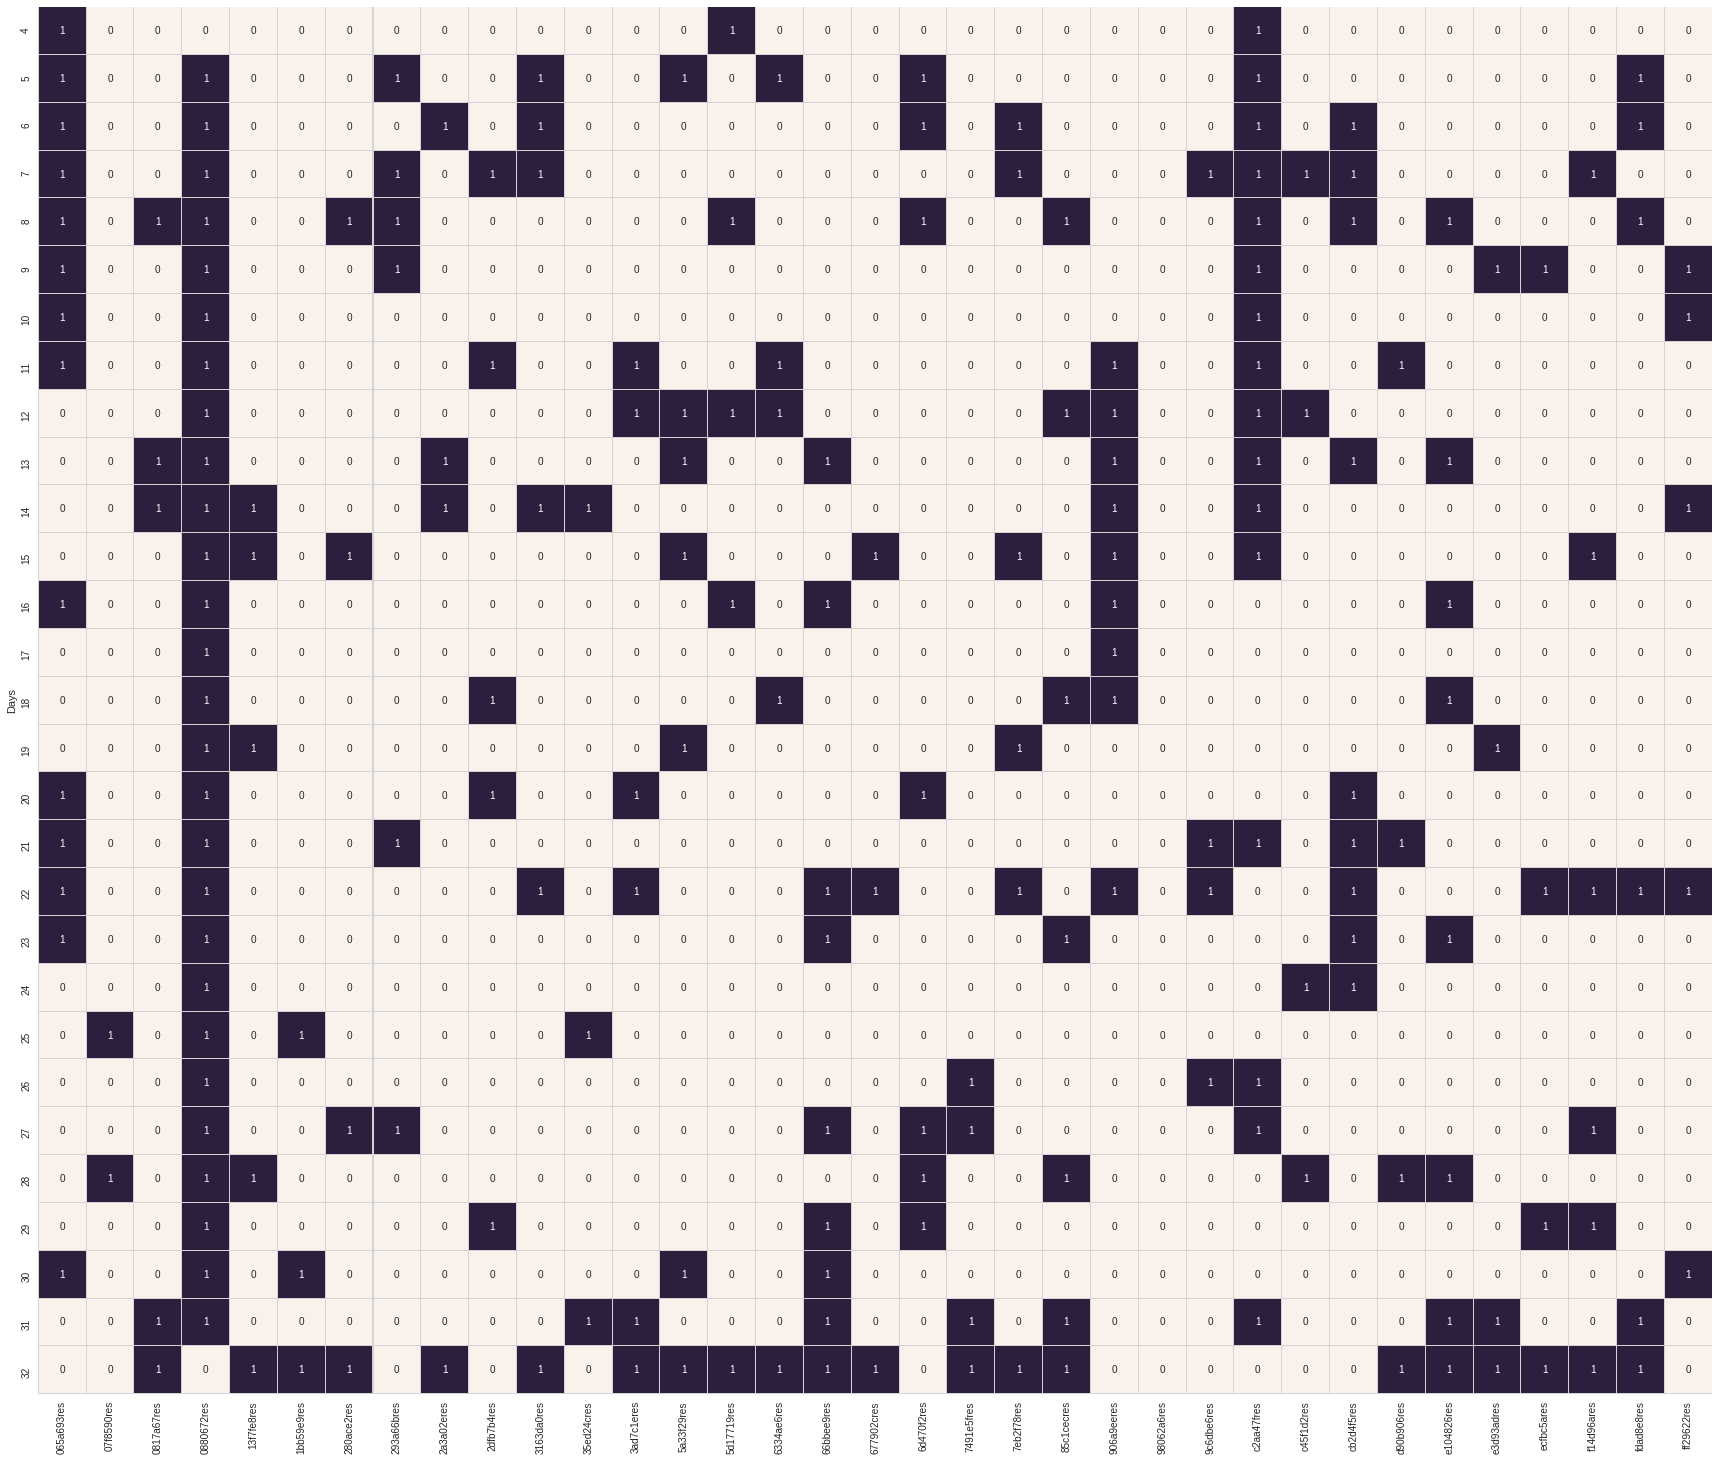

In [73]:
#final.loc[2:100]
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:num_of_days], linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 

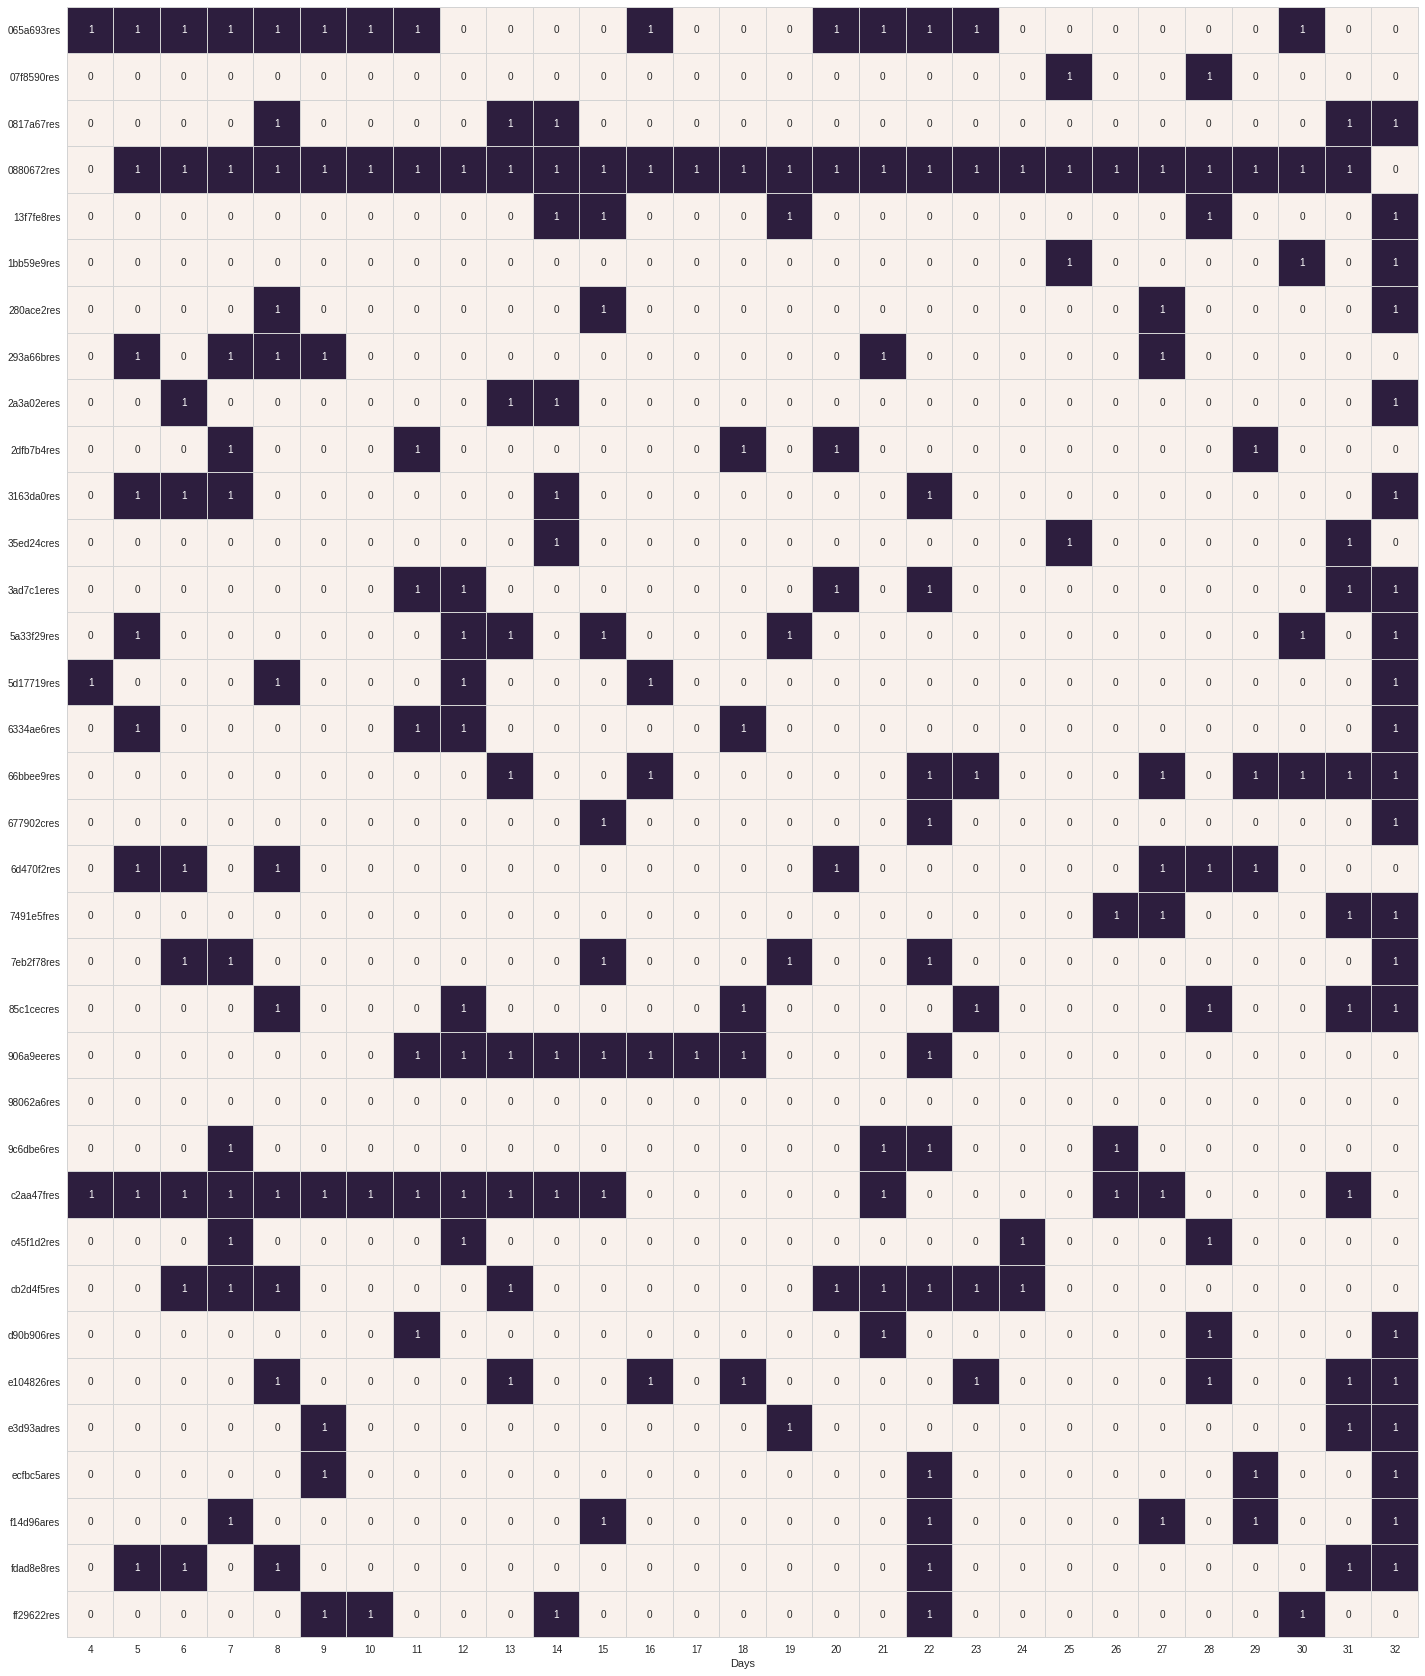

In [72]:
#final.loc[2:100]
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(ax=ax, data=final[2:num_of_days].T, linecolor='lightgrey', linewidths=.01,cbar=False,annot=True,square =True) 

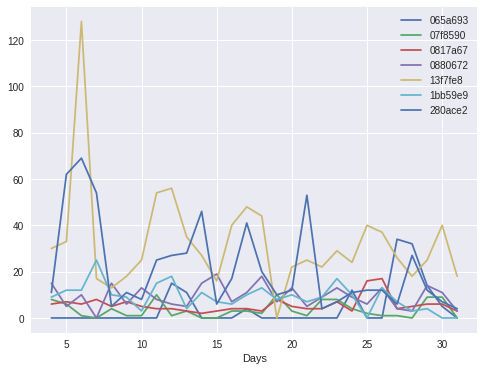

In [71]:
reference_df.iloc[2:num_of_days,0:7].plot(figsize=(8,6))